In [1]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import scale

In [2]:
df = pd.read_csv('data/banana.csv', names=['x1', 'x2', 'y'])

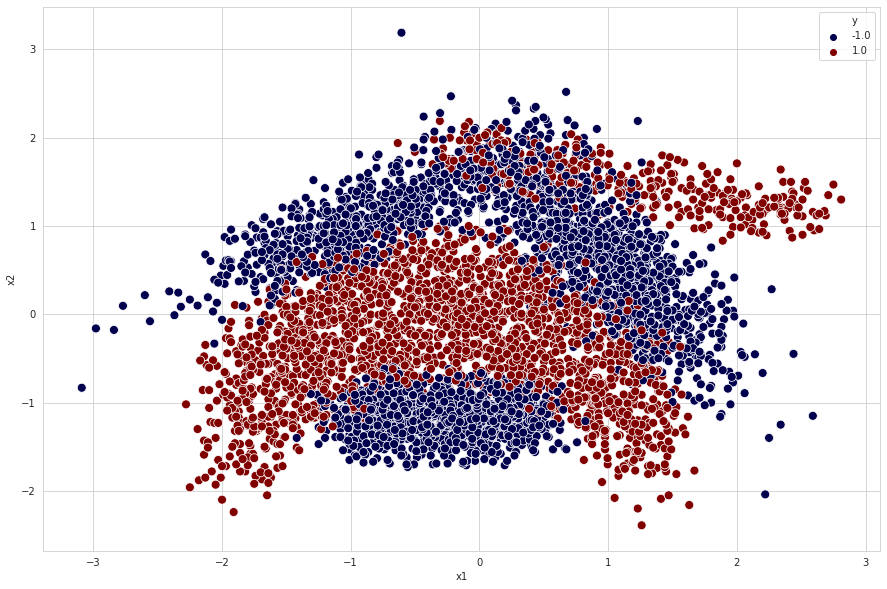

In [4]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data=df, x='x1', y='x2', hue='y', ax=ax, legend='full', palette='seismic', s=80)

In [6]:
X = scale(df[['x1', 'x2']])
y = df['y']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3
)

In [8]:
gammas = ['auto'] + np.logspace(-5, 5, 11).tolist()
Cs = np.logspace(-5, 5, 11).tolist()
coefs = [-10, 1, 0, 1, 10]


parameters = [
    {
        'kernel': ['rbf'],
        'gamma': gammas,
        'C': Cs
    },
    {
        'kernel': ['linear'],
        'C': Cs
    },
    {
        'kernel': ['sigmoid'],
        'gamma': gammas,
        'coef0': coefs
        'C': Cs
    },
    {
        'kernel': ['poly'],
        'gamma': gammas,
        'degree': [2, 3, 4, 5],
        'coef0': coefs
        'C': Cs
    }
]

In [9]:
clf = GridSearchCV(SVC(), parameters, cv=2, n_jobs=-1)
clf.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                                100.0, 1000.0, 10000.0, 100000.0],
                          'gamma': ['auto', 1e-05, 0.0001, 0.001, 0.01, 0.1,
                                    1.0, 10.0, 100.0, 1000.0, 10000.0,
                                    100000.0],
                          'kernel': ['rbf']},
                         {'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                                100.0, 1000.0, 10000.0, 100000.0],
                       

In [10]:
results = pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score')

In [14]:
results.shape

(143, 13)

In [15]:
results.to_csv('results_cv2.csv', index=False)